# Fišerův problém revisited

## Úvod

V tomto praktiku si předvedeme určení neznámé veličiny $C(T)$ definované jako součin $$C(T) = A(T) \, B(T),$$ přičemž veličiny $A(T)$, $B(T)$ jsme určili měřením. Určíme zároveň směrnici závislosti veličiny $C$ na $T$.

## Měření

jsme si trochu nešikovně zapsali do dvou csv souborů (``data1.csv`` a ``data2.csv``):

In [1]:
ls

data1.csv  fiser.pdf  praktikum.html   revtex_nocode.tplx
data2.csv  fiser.png  praktikum.ipynb


In [2]:
!cat data1.csv

T,A,B
15.0,0.1734,459.0
16.0,0.1782,450.0
17.0,0.1831,441.0
18.0,0.1878,435.0
19.0,0.1926,427.0
20.0,0.1974,419.0
21.0,0.2022,411.0


In [3]:
!cat data2.csv

T,A,B
18.0,0.1882,435.0
19.0,0.1930,427.0
20.0,0.1978,419.0
21.0,0.2026,411.0
22.0,0.2087,402.0
23.0,0.2359,420.0
24.0,0.2201,385.0


In [4]:
import pandas

In [5]:
data1 = pandas.read_csv('data1.csv')
data1

,T,A,B
0,15.0,0.1734,459.0
1,16.0,0.1782,450.0
2,17.0,0.1831,441.0
3,18.0,0.1878,435.0
4,19.0,0.1926,427.0
5,20.0,0.1974,419.0
6,21.0,0.2022,411.0


In [6]:
data2 = pandas.read_csv('data2.csv')
data2

,T,A,B
0,18.0,0.1882,435.0
1,19.0,0.1930,427.0
2,20.0,0.1978,419.0
3,21.0,0.2026,411.0
4,22.0,0.2087,402.0
5,23.0,0.2359,420.0
6,24.0,0.2201,385.0


## Úkol 1

Vidíme, že data jsou tentokrát trochu komplikovanější. Jako první musíme data sloučit do jednoho DataFrame.

Najdete způsob, jak to vyřešit?

In [7]:
data = pandas.concat([data1, data2])
data

,T,A,B
0,15.0,0.1734,459.0
1,16.0,0.1782,450.0
2,17.0,0.1831,441.0
3,18.0,0.1878,435.0
4,19.0,0.1926,427.0
5,20.0,0.1974,419.0
6,21.0,0.2022,411.0
0,18.0,0.1882,435.0
1,19.0,0.1930,427.0
2,20.0,0.1978,419.0


## Úkol 2

Výborně! Bohužel v této formě jsou data trochu nepřehledná, bylo by dobré data setřídit podle parametru $T$.

In [8]:
data = data.sort_values('T')
data

,T,A,B
0,15.0,0.1734,459.0
1,16.0,0.1782,450.0
2,17.0,0.1831,441.0
3,18.0,0.1878,435.0
0,18.0,0.1882,435.0
4,19.0,0.1926,427.0
1,19.0,0.1930,427.0
5,20.0,0.1974,419.0
2,20.0,0.1978,419.0
6,21.0,0.2022,411.0


## Úkol 3

Vidíme, že pro některé hodnoty $T$ máme dvě měření, bylo by dobré nahradit hodnoty $A$ a $B$ pro tyto hodnty $T$ aritmetickým průměrem.

In [9]:
import numpy
data = data.groupby('T').aggregate(numpy.average)
data

,A,B
T,,
15.0,0.1734,459.0
16.0,0.1782,450.0
17.0,0.1831,441.0
18.0,0.1880,435.0
19.0,0.1928,427.0
20.0,0.1976,419.0
21.0,0.2024,411.0
22.0,0.2087,402.0
23.0,0.2359,420.0


## Úkol 4

Vyneste závislost veličiny $A$ a $B$ na $T$, každou závislost do samostatného grafu.

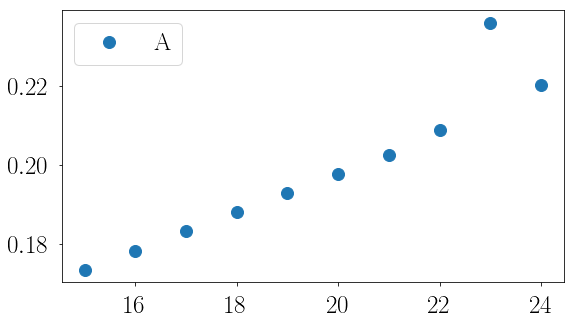

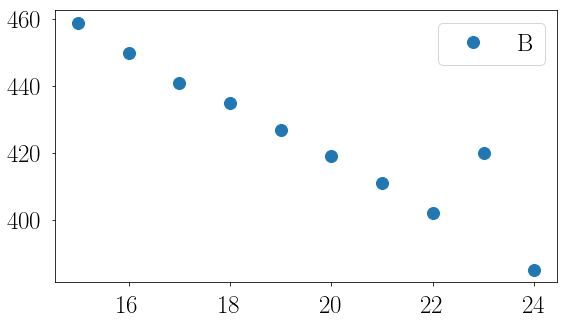

In [10]:
import matplotlib.pyplot
%matplotlib inline

matplotlib.pyplot.rcParams['figure.autolayout'] = False
matplotlib.pyplot.rcParams['figure.figsize'] = 9, 5
matplotlib.pyplot.rcParams['axes.labelsize'] = 25
matplotlib.pyplot.rcParams['axes.titlesize'] = 25
matplotlib.pyplot.rcParams['font.size'] = 25
matplotlib.pyplot.rcParams['lines.linewidth'] = 2.0
matplotlib.pyplot.rcParams['lines.markersize'] = 12
matplotlib.pyplot.rcParams['legend.fontsize'] = 25
matplotlib.pyplot.rcParams['text.usetex'] = True
matplotlib.pyplot.rcParams['text.latex.unicode'] = True
matplotlib.pyplot.rcParams['font.family'] = "serif"
matplotlib.pyplot.rcParams['font.serif'] = "cm"
matplotlib.pyplot.rcParams['xtick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['ytick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

matplotlib.pyplot.plot(data.index, data['A'], 'o', label='A')
matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(data.index, data['B'], 'o', label='B')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

## Úkol 5

Vidíme, že měření $A$ vykazuje anomalitu pro hodnotu $T = 23$. Odstraňte toto měření z DataFrame a opět vyneste obě závislosti do grafů.

In [11]:
data = data[data.index != 23.0]
data

,A,B
T,,
15.0,0.1734,459.0
16.0,0.1782,450.0
17.0,0.1831,441.0
18.0,0.1880,435.0
19.0,0.1928,427.0
20.0,0.1976,419.0
21.0,0.2024,411.0
22.0,0.2087,402.0
24.0,0.2201,385.0


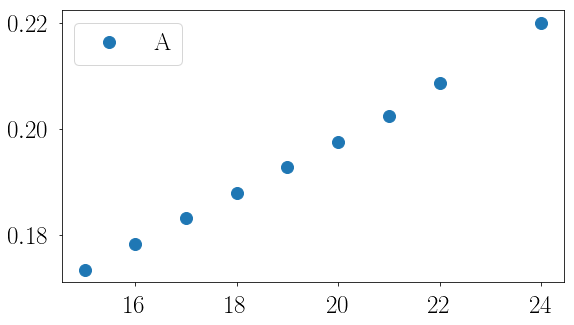

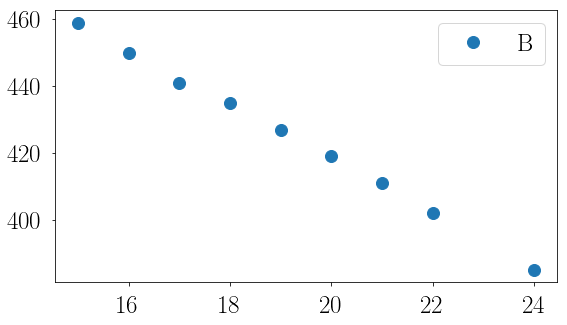

In [12]:
matplotlib.pyplot.plot(data.index, data['A'], 'o', label='A')
matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(data.index, data['B'], 'o', label='B')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

## Úkol 6

Dopočtěte veličinu $C$ a vyneste ji do grafu.

In [13]:
data['C'] = data['A'] * data['B']
data

/home/kubaw/.virtualenvs/modern/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,A,B,C
T,,,
15.0,0.1734,459.0,79.5906
16.0,0.1782,450.0,80.1900
17.0,0.1831,441.0,80.7471
18.0,0.1880,435.0,81.7800
19.0,0.1928,427.0,82.3256
20.0,0.1976,419.0,82.7944
21.0,0.2024,411.0,83.1864
22.0,0.2087,402.0,83.8974
24.0,0.2201,385.0,84.7385


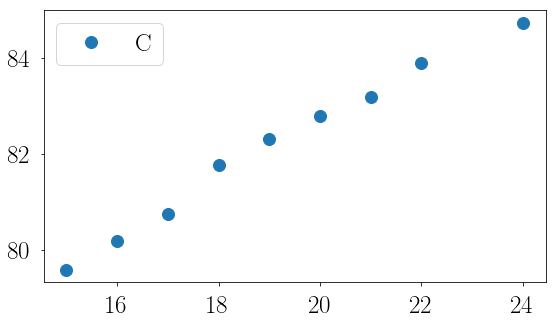

In [14]:
matplotlib.pyplot.plot(data.index, data['C'], 'o', label='C')
matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.show()

## Úkol 7

Proložte data přímkou v rozmezí $T \in [15, 18]$ a $T \in [19, 24]$ (tedy dvě regrese). Pak proložte data přímkou v celém intervalu $T$, vše vyneste do jednoho grafu, do legendy grafu vypište hodnoty směrnic s přesností na tři desetinná místa. Graf uložte do souboru ve formátu pdf a png.

In [15]:
data.loc[15:18]

,A,B,C
T,,,
15.0,0.1734,459.0,79.5906
16.0,0.1782,450.0,80.1900
17.0,0.1831,441.0,80.7471
18.0,0.1880,435.0,81.7800


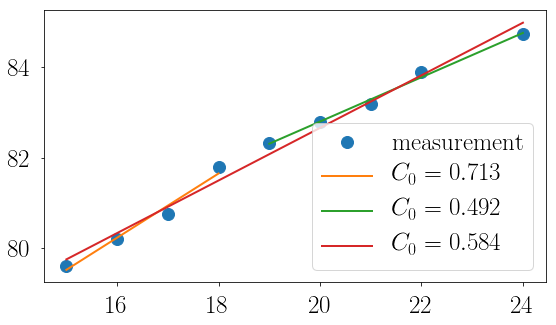

In [16]:
import scipy.optimize

def f(x, C0, C1):
    return C0 * x + C1

data1 = data.loc[15:18]
data2 = data.loc[19:]

matplotlib.pyplot.plot(data.index, data['C'], 'o', label='measurement')
popt, pcov = scipy.optimize.curve_fit(f, data1.index, data1['C'])
y = f(data1.index, popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data1.index, y, label=r'$C_0 = {:0.3f}$'.format(popt[0]))

popt, pcov = scipy.optimize.curve_fit(f, data2.index, data2['C'])
y = f(data2.index, popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data2.index, y, label=r'$C_0 = {:0.3f}$'.format(popt[0]))

popt, pcov = scipy.optimize.curve_fit(f, data.index, data['C'])
y = f(data.index, popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data.index, y, label=r'$C_0 = {:0.3f}$'.format(popt[0]));

matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.savefig('fiser.pdf')
matplotlib.pyplot.savefig('fiser.png')

In [17]:
ls

data1.csv  fiser.pdf  praktikum.html   revtex_nocode.tplx
data2.csv  fiser.png  praktikum.ipynb
